# Twitter Data Collection

## Authentication

In order to reach user profiles, their tweets, and interaction between them, some authentication & authorization conditions should be provided via an application which belongs to a person's twitter account and twitter utilizes phone number registered to account to check if the person is real or not. 

An application can be created by following the instructions at the url https://apps.twitter.com After this process, twitter supplies API Key and API Secret for your application, a kind of ID for your App, and Access Token and Access Token Secret which are used when your App tries to get content or information from twitter. App permisions can be specified according to your needs.  

## Getting Twitter API keys:

1. Login to https://apps.twitter.com and "Create a New App".
2. Fill out the form.
3. Click "Keys and Access Tokens" tab and copy "API key", API secret".
4. Click "Create my Access Token" and copy "Access token" and "Access token secret".

In [28]:
import json #responses will be in JSON format
import oauth2 #have to be downloaded to virtual machine

Consumer_Key = "YOUR KEY" # API key
Consumer_Secret = "YOUR SECRET" # API secret

Access_Token = "YOUR TOKEN"
Access_Token_Secret = "YOUR TOKEN SECRET"

consumer = oauth2.Consumer(key=Consumer_Key,secret=Consumer_Secret)
access_token = oauth2.Token(key=Access_Token,secret=Access_Token_Secret)
client = oauth2.Client(consumer,access_token)

## Twitter API reference

https://dev.twitter.com/rest/reference

# User Profile

In [2]:
import urllib, cStringIO
from PIL import Image
from IPython import display

In [3]:
usernames = ["arman_boyaci", "akbayraksemih", "AliTaylanCemgil"]

In [4]:
request = "https://api.twitter.com/1.1/users/lookup.json?screen_name="+",".join(usernames)
response,data = client.request(request)

In [5]:
def show_user_profile(user_data):
    info = ["profile_image_url", "name", "location", "created_at", "lang", "protected", "description", "time_zone"]
    for i in info:
        if i == "profile_image_url":
            URL = user_data[i]
            file = cStringIO.StringIO(urllib.urlopen(URL).read())
            img = Image.open(file)
            display.display(img)
        else:
            print i , ":" ,  user_data[i]

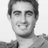

name : Arman Boyaci
location : Istanbul, TURKEY
created_at : Thu Apr 28 14:28:41 +0000 2011
lang : en
protected : False
description : 
time_zone : Quito


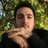

name : Semih Akbayrak
location : 
created_at : Wed Jan 04 22:01:08 +0000 2012
lang : tr
protected : True
description : Partizan Belgrade
time_zone : Pacific Time (US & Canada)


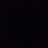

name : taylan
location : Istanbul
created_at : Wed Jan 11 21:29:16 +0000 2012
lang : en
protected : False
description : 
time_zone : Istanbul


In [6]:
for ix,user in enumerate(usernames):
    show_user_profile(json.loads(data)[ix])

# Friends

### Followers

In [7]:
username = "AliTaylanCemgil"

In [8]:
request = "https://api.twitter.com/1.1/followers/ids.json?screen_name="+username+"&skip_status=true&include_user_entities=false&count=200"
response,data = client.request(request)

In [9]:
followers = json.loads(data)["ids"]
followers

[766058630,
 621215789,
 811984091067334657,
 287028310,
 81055540,
 897274819,
 327432999,
 1476690738,
 29422282,
 190700863,
 823957466,
 80919307,
 246427772,
 289238422,
 156917922,
 201382150,
 1365711606,
 2188258688,
 4638431907,
 3971726373,
 272667048,
 2445151619,
 3663273569,
 1108918693,
 171854757,
 20516052,
 607485944,
 3000964367,
 355060363,
 1599300264,
 24606441,
 101203656,
 249899993,
 619003657,
 705705990,
 779168588921991168,
 791532379,
 787333345818603520,
 1923842544,
 43152485,
 290769954,
 88999019,
 232373515,
 83685531,
 1573585004,
 282988905,
 2267754642,
 361781762,
 70135719,
 372042061,
 2375699290,
 758544071438770176,
 748178478927851520,
 2496596646,
 1292236771,
 743219326396809216,
 336541378,
 1483177753,
 709817126341595137,
 470613803,
 189273419,
 775444212263387136,
 105453862,
 390762829,
 1219086212,
 2803112647,
 3290517299,
 1319139576,
 767065890290532352,
 456925104,
 2251689216,
 1349528713,
 204530461,
 762544581590257665,
 2887984

In [10]:
request = "https://api.twitter.com/1.1/users/lookup.json?user_id="+",".join([str(f) for f in followers[:100]])
response,data = client.request(request, method="POST")

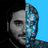

name : MehmetBurakTORUN
location : Ankara, Türkiye
created_at : Sat Aug 18 17:12:53 +0000 2012
lang : tr
protected : False
description : Sosyal Medya Uzmanı & Dijital Stratejist #YazilimMuhendisi #İnodes #CEO #SocialMedia #BilisimDernegi  #TurkcellBlog  İletişim: buraktorun@ajansmention.com
time_zone : Istanbul


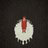

name : Metin Ak
location : Türkiye
created_at : Thu Jun 28 18:47:57 +0000 2012
lang : tr
protected : True
description : 
time_zone : Istanbul


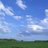

name : Remzi Kent
location : istanbul
created_at : Thu Dec 22 17:17:48 +0000 2016
lang : en
protected : False
description : 
time_zone : Eastern Time (US & Canada)


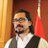

name : Yavuz Selvi
location : ...
created_at : Sun Apr 24 05:21:05 +0000 2011
lang : tr
protected : False
description : Doç. Dr. Yavuz Selvi Psikiyatrist dryavuzselvi@gmail.com #sinirbilim #psikiyatri #uyku #psikoloji #eğitim #Konya
time_zone : Istanbul


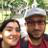

name : Omurhan Soysal
location : Ankara
created_at : Fri Oct 09 07:44:10 +0000 2009
lang : en
protected : True
description : Senior Software Engineer, Electrical&Electronics Engineer, PhD Candidate, Computer Engineering
time_zone : Istanbul


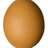

name : yerli malı
location : 
created_at : Mon Oct 22 10:35:42 +0000 2012
lang : tr
protected : False
description : 
time_zone : Baghdad


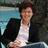

name : Nebahat Uzun
location : ankara
created_at : Fri Jul 01 15:18:25 +0000 2011
lang : tr
protected : False
description : #Reklam #Onlineİtibar #DijitalPazarlama https://t.co/vZGRo3QfmQ / https://t.co/xlDLN9pqM9
time_zone : Istanbul


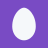

name : Eren Soyak
location : 
created_at : Sun Jun 02 07:58:40 +0000 2013
lang : en
protected : False
description : 
time_zone : Athens


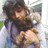

name : lale barlas
location : 
created_at : Tue Apr 07 10:33:03 +0000 2009
lang : en
protected : False
description : 
time_zone : Baghdad


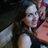

name : Nihan Karslıoğlu
location : 
created_at : Tue Sep 14 16:34:22 +0000 2010
lang : tr
protected : True
description : I tweet, therefore I am.
time_zone : Baghdad


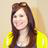

name : Hanna Wallach
location : Brooklyn, NY
created_at : Fri Sep 14 20:38:24 +0000 2012
lang : en
protected : False
description : CS professor. MSR NYC. Computational social science, data science, machine learning, parkour, Python, roller derby, sloths, vegan treats, visualization.
time_zone : Eastern Time (US & Canada)


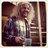

name : Ersin Basaran
location : 
created_at : Thu Oct 08 19:12:01 +0000 2009
lang : en
protected : True
description : 
time_zone : Greenland


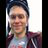

name : Aaron Schein
location : Northampton, MA
created_at : Wed Feb 02 19:32:28 +0000 2011
lang : en
protected : False
description : PhD student @ UMass Amherst. Bayesian statistics, machine learning, political science, computational linguistics.
time_zone : Quito


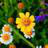

name : NzN
location : 
created_at : Thu Apr 28 08:32:25 +0000 2011
lang : tr
protected : True
description : 
time_zone : Istanbul


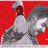

name : Electrosnake
location : 
created_at : Fri Jun 18 08:46:26 +0000 2010
lang : en
protected : True
description : sarı-lacivert çubuklu
time_zone : Brasilia


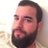

name : Emre
location : 
created_at : Mon Oct 11 18:39:25 +0000 2010
lang : tr
protected : False
description : Computer Engineer - Machine Learning - Intelligent Robotic
time_zone : Quito


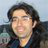

name : I. Sengor Altingovde
location : Turkey
created_at : Sat Apr 20 00:26:49 +0000 2013
lang : en
protected : True
description : Researcher on Web Search, IR and data mining, Asst. Prof. of Computer Science at Middle East Technical University
time_zone : Istanbul


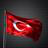

name : Batuhan Kerem
location : İstanbul
created_at : Mon Nov 11 12:04:59 +0000 2013
lang : tr
protected : False
description : Mühendis
time_zone : Athens


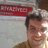

name : Alp Bassa
location : 
created_at : Tue Dec 29 02:26:57 +0000 2015
lang : en
protected : False
description : 
time_zone : None


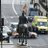

name : 📷
location : 10. köy 
created_at : Fri Oct 16 11:50:08 +0000 2015
lang : tr
protected : False
description : Bu size saçma,çocuksu,aptalca gelebilir...
ben 250 bin kare fotoğraf paylaşacağım
not sizde fotoğraf göndererek destek olabirsiniz Tam bağımsız fotoğraf sayfası
time_zone : Pacific Time (US & Canada)


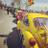

name : Ozan
location : 
created_at : Sat Mar 26 23:19:31 +0000 2011
lang : en
protected : True
description : 
time_zone : Istanbul


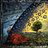

name : Işıl Candemir
location : 
created_at : Sat Mar 29 18:24:36 +0000 2014
lang : en
protected : False
description : 
time_zone : None


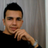

name : Ahmet Münir
location : 
created_at : Tue Sep 15 11:14:38 +0000 2015
lang : tr
protected : False
description : 
time_zone : None


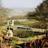

name : ozdenyilmazer
location : 
created_at : Mon Jan 21 12:31:59 +0000 2013
lang : tr
protected : False
description : citta:startup:coop:japan:gourm:16:9: sustainable:scandinavia:rdev:agricult: book:chopper/custom:urban:polyglot: edu:tephrike:beirut:..
time_zone : None


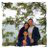

name : Tuba Türker
location : 
created_at : Wed Jul 28 09:52:31 +0000 2010
lang : tr
protected : False
description : Ömer'in Sevgilisi ❤️ Ömür'ün Annesi ❤️ Tipik yengeç
time_zone : Greenland


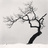

name : Aykut Erdem
location : Ankara
created_at : Tue Feb 10 14:28:10 +0000 2009
lang : en
protected : False
description : 
time_zone : Istanbul


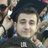

name : deniz
location : 
created_at : Wed Jun 13 19:34:01 +0000 2012
lang : en
protected : False
description : Our time is precious.. LET'S WASTE IT! BOUN CmpE
time_zone : Istanbul


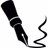

name : Son Köşe Yazıları
location : Turkey
created_at : Tue Jan 27 07:20:39 +0000 2015
lang : en
protected : False
description : Türkiye' nin en çok okunan yazarları bu sitede.
https://t.co/tOHnXJy4rc
time_zone : None


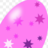

name : ve_perdee_
location : 
created_at : Sun Aug 14 19:21:57 +0000 2011
lang : tr
protected : True
description : Don't compare yourself with anyone in this world...if you do so, you are insulting yourself. -Bill Gates
time_zone : Quito


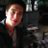

name : Hakkı Selim Öztürk
location : Türkiye 
created_at : Tue Jul 16 21:38:24 +0000 2013
lang : en-gb
protected : False
description : Boğaziçi Üniversitesi
time_zone : Istanbul


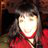

name : Esin Yavuz
location : Brighton
created_at : Sun Mar 15 23:19:18 +0000 2009
lang : en
protected : False
description : Neuroscientist, data enthusiast and dreamer. Co-founder @cyanapse.
time_zone : London


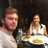

name : Ekin
location : 
created_at : Sat Jan 02 11:48:23 +0000 2010
lang : en
protected : False
description : Efsanenin ruhuyla, fırtınanın peşinde ...
time_zone : Greenland


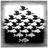

name : Cansu
location : Istanbul
created_at : Thu Feb 10 00:49:20 +0000 2011
lang : en
protected : False
description : 
time_zone : Istanbul


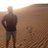

name : Alp
location : 
created_at : Tue Jun 26 11:50:12 +0000 2012
lang : tr
protected : False
description : uzaylı da olsa insan insandır
time_zone : Athens


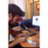

name : Barış Uçaktürk
location : 
created_at : Thu Jul 19 20:12:10 +0000 2012
lang : tr
protected : True
description : Bogazici University - CmpE
time_zone : None


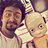

name : Eren BOZARIK
location : Istanbul, Turkey
created_at : Fri Sep 23 04:00:42 +0000 2016
lang : en
protected : False
description : Robotics Enthusiast . IEEE Volunteer
time_zone : None


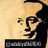

name : Edebiyat Kültürü
location : 
created_at : Thu Aug 30 12:48:47 +0000 2012
lang : tr
protected : False
description : Reklam ve iletişim için ✉️ edebiyatkulturuofficial@gmail.com
time_zone : Baghdad


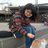

name : Buse
location : 
created_at : Sat Oct 15 16:44:32 +0000 2016
lang : tr
protected : True
description : 
time_zone : None


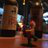

name : Esra Sabancı
location : 
created_at : Tue Oct 01 16:04:57 +0000 2013
lang : tr
protected : True
description : 
time_zone : None


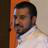

name : Serdar Başeğmez
location : Istanbul
created_at : Thu May 28 17:21:36 +0000 2009
lang : en
protected : False
description : #XPages konuşur, #OpenSource yazar, #IBMChampion olmuştur, blog yazar, eleştirel düşünür, Kız babasıdır, @yalansavar ekibindedir,  For English @serdar_basegmez
time_zone : Istanbul


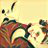

name : Ezgi Uluhan
location : 
created_at : Sat Apr 30 22:00:23 +0000 2011
lang : tr
protected : False
description : 
time_zone : Hawaii


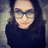

name : Sahika Koyun
location : Istanbul
created_at : Tue Nov 10 19:17:27 +0000 2009
lang : tr
protected : False
description : sıcak kumlar tercihim.
time_zone : Istanbul


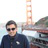

name : Burak Önal
location : Istanbul
created_at : Fri Dec 31 00:09:08 +0000 2010
lang : tr
protected : False
description : IEL'08 
BU'13
time_zone : Greenland


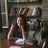

name : Ezgi Gülenç
location : 
created_at : Mon Oct 19 20:48:53 +0000 2009
lang : tr
protected : True
description : Kadıköy - Ankara...
time_zone : Santiago


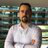

name : İlker Arslan
location : 
created_at : Sat Jul 06 20:19:45 +0000 2013
lang : en
protected : False
description : 
time_zone : None


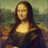

name : Burak Dağlı
location : 
created_at : Sat Apr 16 10:26:54 +0000 2011
lang : en
protected : False
description : 
time_zone : None


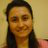

name : DiYa
location : 
created_at : Sun Dec 29 18:38:15 +0000 2013
lang : tr
protected : True
description : 
time_zone : Pacific Time (US & Canada)


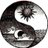

name : Diren Yıldırım
location : 
created_at : Thu Aug 25 09:52:27 +0000 2011
lang : en
protected : False
description : 
time_zone : Hawaii


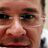

name : sdtkcdgn
location : Turkey
created_at : Sun Aug 30 14:58:28 +0000 2009
lang : tr
protected : False
description : Cuculla non facit monachum. Nec forma te virum
time_zone : Istanbul


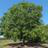

name : smlo
location : 
created_at : Mon Sep 12 00:58:35 +0000 2011
lang : tr
protected : False
description : 
time_zone : Greenland


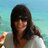

name : oya ozagac
location : 
created_at : Sun Mar 02 11:39:57 +0000 2014
lang : en
protected : False
description : 
time_zone : None


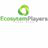

name : Ecosystem Players
location : İstanbul, Türkiye
created_at : Thu Jul 28 06:06:14 +0000 2016
lang : tr
protected : False
description : Cloud Services for SMEs and Large Enterprises
time_zone : None


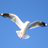

name : Kaan Öztürk
location : 
created_at : Wed Jun 29 15:37:04 +0000 2016
lang : en
protected : False
description : Omnia mea mecum porto
time_zone : Athens


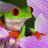

name : Mehmet Y.
location : 
created_at : Thu May 15 15:44:44 +0000 2014
lang : tr
protected : False
description : 
time_zone : Pacific Time (US & Canada)


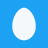

name : X
location : 
created_at : Sat Mar 23 18:58:51 +0000 2013
lang : tr
protected : False
description : 
time_zone : None


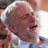

name : Itınyo Gramsci
location : 
created_at : Wed Jun 15 23:11:10 +0000 2016
lang : en
protected : False
description : mülkiyet düşmanı biraz sosyelist birey
time_zone : None


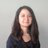

name : fadime özer
location : 
created_at : Sat Jul 16 13:35:22 +0000 2011
lang : tr
protected : False
description : 
time_zone : Greenland


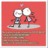

name : saoguz
location : 
created_at : Tue Jun 04 20:10:37 +0000 2013
lang : tr
protected : True
description : 
time_zone : Baghdad


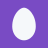

name : Suna Gursu
location : 
created_at : Tue Mar 15 19:02:45 +0000 2016
lang : en
protected : False
description : 
time_zone : None


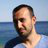

name : Arif Bayırlı
location : Istanbul, Turkey
created_at : Sat Jan 21 23:35:46 +0000 2012
lang : en
protected : False
description : @Boğaziçi Ünv. Fizik Bölümü - CERN ATLAS & CAST Exp. https://t.co/t7194TdJcA
time_zone : Pacific Time (US & Canada)


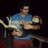

name : Eren Kovanlıkaya
location : 
created_at : Fri Sep 10 20:56:54 +0000 2010
lang : en
protected : False
description : 
time_zone : Athens


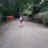

name : Burcak
location : 
created_at : Mon Sep 12 21:21:22 +0000 2016
lang : tr
protected : True
description : 
time_zone : None


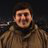

name : Yaşarcan Yılmaz
location : İstanbul
created_at : Sat Jan 16 11:35:50 +0000 2010
lang : en
protected : False
description : Data Scientist and MSc. Student @UniBogazici; passionate about Big Data, Data Mining, Spark, Scala, Python and R.
time_zone : Istanbul


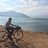

name : Gizem Dursun
location : 
created_at : Fri Oct 14 14:26:40 +0000 2011
lang : tr
protected : True
description : 
time_zone : Istanbul


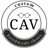

name : CAV  SHOES
location : 
created_at : Mon Feb 25 15:41:45 +0000 2013
lang : tr
protected : False
description : 
time_zone : None


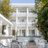

name : Büyükada ÇankayaOtel
location : Büyükada, İstanbul 
created_at : Thu Sep 11 05:30:35 +0000 2014
lang : en
protected : False
description : Büyükada Çankaya mevkinde kurulu adaya özgü Rum mimarisinin günümüz teknolojisiyle buluştuğu Büyükada Çankaya Otel, romantik ve konforlu bir ada tatili sunuyor.
time_zone : None


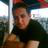

name : Yücel Özcan
location : 
created_at : Tue May 19 21:45:26 +0000 2015
lang : tr
protected : False
description : 
time_zone : None


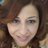

name : lirikdensizlik
location : İstanbul, Türkiye
created_at : Sun Mar 31 21:32:32 +0000 2013
lang : tr
protected : False
description : lirik,ironik,estetik,sanat sevdalısı,kitap bağımlısı,sinemasever,anne,rakı balık olmazsa olmazı,cemal süreya hayranı,yazan,çizen,imla kurallarını seven...
time_zone : Pacific Time (US & Canada)


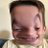

name : Poyraz Birbil
location : İstanbul, Türkiye
created_at : Sat Aug 20 18:28:54 +0000 2016
lang : tr
protected : False
description : Ben Benim İtraz Etme...
time_zone : None


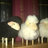

name : alaattin oğuztimur
location : Istanbul
created_at : Fri Jan 06 20:40:57 +0000 2012
lang : en
protected : False
description : 
time_zone : Athens


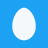

name : Çiğdem Taşkın
location : 
created_at : Wed Dec 18 09:04:15 +0000 2013
lang : en
protected : True
description : 
time_zone : Pacific Time (US & Canada)


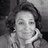

name : Hacer Sayman
location : 
created_at : Sat Apr 13 15:30:58 +0000 2013
lang : tr
protected : False
description : 
time_zone : Hawaii


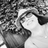

name : Gökçe Yeşiltaş
location : İstanbul
created_at : Mon Oct 18 22:28:23 +0000 2010
lang : en
protected : False
description : 
time_zone : Baghdad


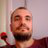

name : Ozan Caglayan
location : 
created_at : Mon Aug 08 07:02:50 +0000 2016
lang : en
protected : False
description : PhD student @ Le Mans, Deep Learning, Neural Machine Translation
time_zone : None


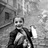

name : Sevgi Öztürk
location : istanbul
created_at : Sat Apr 04 22:00:36 +0000 2009
lang : en
protected : True
description : In and Out of Consciousness
time_zone : Istanbul


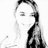

name : Aysegul Gzr
location : Michigan, USA
created_at : Sat Jun 16 19:30:42 +0000 2012
lang : en
protected : False
description : Me? Ok, once upon a time I was a single cell...
time_zone : Central Time (US & Canada)


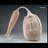

name : Hüden Neşe
location : 
created_at : Tue Nov 16 19:16:41 +0000 2010
lang : en
protected : True
description : 
time_zone : None


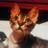

name : .
location : 
created_at : Thu Nov 27 17:47:28 +0000 2014
lang : en
protected : True
description : 
time_zone : Pacific Time (US & Canada)


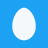

name : underground
location : 
created_at : Mon Jul 18 02:47:38 +0000 2016
lang : tr
protected : False
description : 
time_zone : None


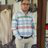

name : Halil Yazıcıoğlu
location : Denizli, Türkiye
created_at : Sat Jul 16 14:12:04 +0000 2016
lang : tr
protected : True
description : 
time_zone : None


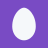

name : Ucyuzonyedi Seref
location : 
created_at : Fri Jul 03 20:26:53 +0000 2015
lang : en
protected : False
description : 
time_zone : None


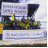

name : İlke Can Tabak
location : 1907 ÜNİFEB
created_at : Fri Feb 07 13:06:37 +0000 2014
lang : tr
protected : False
description : Çukurova Üniversitesi-Diş Hekimliği Fakültesi Münferit,Sosyalist,Belki Dentist... • EZLN
time_zone : None


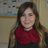

name : Ayşe Cansu u0130mre
location : Ereğli, Konya
created_at : Mon May 30 11:01:48 +0000 2016
lang : tr
protected : False
description : içim pis benim içim,  yoksa özümde iyi çocuğum
time_zone : None


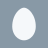

name : Nlnktlhn
location : 
created_at : Fri May 06 18:25:36 +0000 2016
lang : tr
protected : False
description : 
time_zone : None


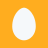

name : Serdar
location : 
created_at : Fri Jul 08 13:19:15 +0000 2016
lang : tr
protected : False
description : 
time_zone : None


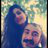

name : karluk akıncı
location : 
created_at : Sat Mar 31 18:35:20 +0000 2012
lang : tr
protected : False
description : Yaşamak bir ağaç gibi tek ve hür, ve bir orman gibi kardeşçesine.
time_zone : Istanbul


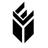

name : Evrensel Basım Yayın
location : İstanbul
created_at : Wed May 09 12:14:38 +0000 2012
lang : tr
protected : False
description : Yayıncılığın Toplumcu Damarı - tel: (212) 255 25 46
time_zone : Istanbul


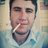

name : Halil Arslan
location : 
created_at : Thu Mar 15 16:57:24 +0000 2012
lang : tr
protected : False
description : yaşasın marksizmin ve leninizmin yüce ideolojisi Yaşasın tam bağımsız Türkiye.  Yaşasın Türk ve Kürt halklarının bağımsızlık mücadelesi. Kahrolsun emperyalizm.
time_zone : Pacific Time (US & Canada)


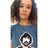

name : Eylem 🤦🏼‍♀️
location : ruhen Ankara. 
created_at : Mon Jan 31 15:07:33 +0000 2011
lang : tr
protected : True
description : karşımda gücümün yetmediği bir taş duvar var diye büsbütün boyun eğmeye de razı olamam.
time_zone : Quito


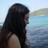

name : Nazan Avci
location : 
created_at : Fri Jan 16 17:30:29 +0000 2015
lang : tr
protected : True
description : 
time_zone : Kyiv


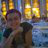

name : Selen Bağcı
location : ~İthaka~
created_at : Mon Dec 19 21:26:16 +0000 2011
lang : tr
protected : True
description : okur, yazar, bazen yazamaz ama yine de sever kelimeleri... zaten onlar da olmasa nesi var ki... bir garip delinin teki.  ~DTCF Tiyatro~
time_zone : Greenland


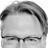

name : Lars Kai Hansen
location : 
created_at : Thu Apr 22 15:45:16 +0000 2010
lang : en
protected : False
description : DTU Professor - my machines see, hear, read, find, feel, guess, diagnose, cure, not yet
time_zone : Bern


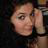

name : Bohemistic
location : Istanbul
created_at : Fri Oct 03 15:00:05 +0000 2008
lang : en
protected : True
description : believe in progress, a chic geek, interested in; web technologies, healthy living, fitness, tennis, cycling, walking; home decor; gym rat, fresh mom.
time_zone : Istanbul


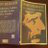

name : füsun çiçekoğlu
location : 
created_at : Thu Feb 13 20:56:09 +0000 2014
lang : tr
protected : False
description : here is where we meet
time_zone : Athens


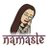

name : gozdemercan
location : 
created_at : Mon Mar 21 17:23:24 +0000 2016
lang : tr
protected : True
description : 
time_zone : None


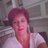

name : Suna K.
location : 
created_at : Tue Dec 15 10:43:38 +0000 2009
lang : en
protected : False
description : 
time_zone : None


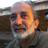

name : Peyami TEK
location : 
created_at : Tue Oct 22 18:32:02 +0000 2013
lang : tr
protected : True
description : Gazeteci - https://t.co/SGrmJ5NnWP
time_zone : None


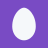

name : kuyucaklis
location : 
created_at : Sun Feb 14 17:45:15 +0000 2016
lang : tr
protected : False
description : 
time_zone : None


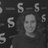

name : Sevecen Tunç
location : 
created_at : Sat Nov 16 13:34:30 +0000 2013
lang : en
protected : False
description : 
time_zone : None


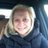

name : Ayse Bener
location : Toronto, Ontario
created_at : Fri Oct 09 09:25:37 +0000 2015
lang : en
protected : False
description : 
time_zone : None


In [11]:
for ix, f in enumerate(followers[:100]):
    try:
        show_user_profile(json.loads(data)[ix])
    except Exception as e:
        pass

### Followings

In [12]:
username = "AliTaylanCemgil"

request = "https://api.twitter.com/1.1/friends/ids.json?screen_name="+username+"&skip_status=true&include_user_entities=false&count=200"
response,data = client.request(request)

followings = json.loads(data)["ids"]
followings

[748178478927851520,
 823957466,
 246427772,
 712054583061823488,
 767065890290532352,
 85648537,
 292849420,
 476582730,
 2573466488,
 4638431907,
 190171522,
 98409905,
 2815077014,
 955131876,
 387156826,
 47767468,
 1494034783,
 1349528713,
 398322770,
 748274650954760193,
 1426217240,
 135934255,
 2890906636,
 325397315,
 433661824,
 108889445,
 1085563848,
 960727483,
 3042649947,
 2397507811,
 4271927776,
 469202043,
 1441335127,
 151893155,
 2844289835,
 3020063511,
 4634012489,
 1553957438,
 3221053997,
 1474575084,
 191463878,
 2916305152,
 454418782,
 2369516304,
 233301082,
 251200142,
 3404501920,
 2186367906,
 3377132271,
 17118071,
 224609329,
 43923450,
 66968296,
 226741183,
 77189080,
 893297702,
 2882902307,
 285739757,
 2844434909,
 87818409,
 346887387,
 15808647,
 549496121,
 1042714190,
 14954916,
 785202319,
 248795646,
 5694822,
 1915220108,
 1411146475,
 73880716,
 13334762,
 33474655,
 2480761964,
 36130972,
 48008938,
 19540483,
 37074463,
 567360618,
 35205

In [13]:
request = "https://api.twitter.com/1.1/users/lookup.json?user_id="+",".join([str(f) for f in followings[:100]])
response,data = client.request(request, method="POST")

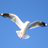

name : Kaan Öztürk
location : 
created_at : Wed Jun 29 15:37:04 +0000 2016
lang : en
protected : False
description : Omnia mea mecum porto
time_zone : Athens


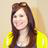

name : Hanna Wallach
location : Brooklyn, NY
created_at : Fri Sep 14 20:38:24 +0000 2012
lang : en
protected : False
description : CS professor. MSR NYC. Computational social science, data science, machine learning, parkour, Python, roller derby, sloths, vegan treats, visualization.
time_zone : Eastern Time (US & Canada)


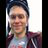

name : Aaron Schein
location : Northampton, MA
created_at : Wed Feb 02 19:32:28 +0000 2011
lang : en
protected : False
description : PhD student @ UMass Amherst. Bayesian statistics, machine learning, political science, computational linguistics.
time_zone : Quito


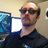

name : Tekin Meriçli
location : Pittsburgh, PA
created_at : Mon Mar 21 23:13:36 +0000 2016
lang : en
protected : False
description : Roboticist and entrepreneur
time_zone : None


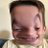

name : Poyraz Birbil
location : İstanbul, Türkiye
created_at : Sat Aug 20 18:28:54 +0000 2016
lang : tr
protected : False
description : Ben Benim İtraz Etme...
time_zone : None


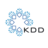

name : ACM SIGKDD KDD'17
location : 
created_at : Tue Oct 27 20:01:15 +0000 2009
lang : en
protected : False
description : The official feed for the ACM SIGKDD Community and KDD 2017 Conference #kdd2017 (https://t.co/ieqtruZ0ZN https://t.co/dUSxdn6WCE)
time_zone : Eastern Time (US & Canada)


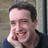

name : Iain Murray
location : Edinburgh
created_at : Wed May 04 10:18:54 +0000 2011
lang : en
protected : False
description : Academic in Machine Learning and Statistics.
time_zone : Edinburgh


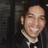

name : Shakir Mohamed
location : DeepMind, London
created_at : Sat Jan 28 08:42:52 +0000 2012
lang : en
protected : False
description : Research Scientist in Statistical Machine Learning. Bayesian reasoning, variational inference, deep learning, reinforcement learning, AI. South African.
time_zone : Pacific Time (US & Canada)


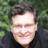

name : John Platt
location : Seattle, Washington
created_at : Tue Jun 17 19:48:52 +0000 2014
lang : en
protected : False
description : Using ML, AI, and data systems to benefit humanity. Now @Google.
time_zone : Pacific Time (US & Canada)


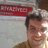

name : Alp Bassa
location : 
created_at : Tue Dec 29 02:26:57 +0000 2015
lang : en
protected : False
description : 
time_zone : None


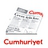

name : Cumhuriyet
location : 
created_at : Mon Sep 13 07:46:17 +0000 2010
lang : tr
protected : False
description : @Cumhuriyetyazar - @KitapKulubu -  @CumKitap -  @CumhuriyetAnk  - @Cumhuriyetarsiv - @SporCumhuriyet - @Cumdergi Facebook http://t.co/FfHOhZ7dGn
time_zone : Istanbul


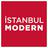

name : İstanbul Modern
location : İstanbul
created_at : Mon Dec 21 16:00:37 +0000 2009
lang : en
protected : False
description : İstanbul Modern Sanat Müzesi / Istanbul Museum of Modern Art
time_zone : Istanbul


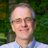

name : Christopher Manning
location : Palo Alto
created_at : Wed Sep 17 14:58:03 +0000 2014
lang : en
protected : False
description : Find out what I'm up to at @stanfordnlp.
time_zone : None


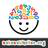

name : Sevdamız Matematik
location : ( - ∞ , + ∞ )
created_at : Sun Nov 18 09:09:34 +0000 2012
lang : tr
protected : False
description : https://t.co/3QmpVkYK0b'un Resmi, bir o kadar da samimi Twitter hesabı...
time_zone : Athens


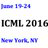

name : ICML Conference
location : New York, NY
created_at : Sat Oct 08 15:28:11 +0000 2011
lang : en
protected : False
description : A premier international conference for researchers on machine learning. June 19-24, 2016 in NYC. #icml2016
time_zone : Eastern Time (US & Canada)


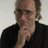

name : Lucas Thorpe
location : Istanbul
created_at : Tue Jun 16 23:06:45 +0000 2009
lang : en
protected : False
description : Assistant professor of philosophy at Bogazici University, Istanbul.
time_zone : Istanbul


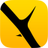

name : Diken
location : 
created_at : Sat Jun 08 21:57:23 +0000 2013
lang : tr
protected : False
description : Yaramazlara biraz batar! - Diken Gazetesi resmi Twitter hesabı
time_zone : Istanbul


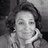

name : Hacer Sayman
location : 
created_at : Sat Apr 13 15:30:58 +0000 2013
lang : tr
protected : False
description : 
time_zone : Hawaii


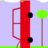

name : Sertan Şentürk
location : Music Technology Group @ UPF
created_at : Tue Oct 25 22:06:53 +0000 2011
lang : en
protected : False
description : PhD. Student in Music Technology (http://t.co/X76EGXlx). Writes in @AgosSapgir & @azbilmisozneler
time_zone : Madrid


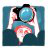

name : Ben Gazeteciyim
location : 
created_at : Wed Jun 29 21:59:14 +0000 2016
lang : tr
protected : False
description : Bir grup gönüllü gazetecinin mesleki dayanışmayı büyütmek amacıyla oluşturduğu twitter hesabıdır. #BenGazeteciyim İngilizce tweetler için: @JournosInTurkey
time_zone : Pacific Time (US & Canada)


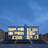

name : DTU Compute
location : Tech. University of Denmark
created_at : Mon May 13 19:23:26 +0000 2013
lang : en
protected : False
description : 
time_zone : Copenhagen


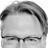

name : Lars Kai Hansen
location : 
created_at : Thu Apr 22 15:45:16 +0000 2010
lang : en
protected : False
description : DTU Professor - my machines see, hear, read, find, feel, guess, diagnose, cure, not yet
time_zone : Bern


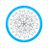

name : Matematik Topluluğu
location : İstanbul, Türkiye
created_at : Mon Nov 24 15:21:26 +0000 2014
lang : tr
protected : False
description : Boğaziçi Üniversitesi Matematik Topluluğu - Math Society- https://t.co/BwQYAG2yqA 
You Tube https://t.co/BJbGpp8AXY --İletişim: info@bounmathsociety.com
time_zone : None


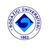

name : Kandilli Rasathanesi
location : 
created_at : Tue Jun 28 06:54:57 +0000 2011
lang : en
protected : False
description : B.Ü. Kandilli Rasathanesi'nin resmi twitter hesabıdır.
RSS erişimi: https://t.co/GnG0UU02eJ
time_zone : Istanbul


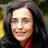

name : Ayşe Hür
location : İstanbul
created_at : Sat Dec 10 21:14:50 +0000 2011
lang : tr
protected : False
description : 
time_zone : Baghdad


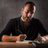

name : hayko bağdat
location : iletisim@haykobagdat.com 
created_at : Wed Jan 27 09:39:33 +0000 2010
lang : tr
protected : False
description : Salyangoz / Gollik / Kurtuluş Çok Bozuldu 
Salyangoz - Tek Kişilik Bişe
time_zone : Greenland


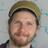

name : Mete Atature
location : Cambridge, UK
created_at : Sun Jan 13 09:38:34 +0000 2013
lang : en
protected : False
description : Professor of Physics at University of Cambridge       Bilingual tweets (English & Turkish), Mostly about science (https://t.co/5PkYMSMgTd)
time_zone : London


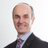

name : David MacKay FRS
location : University of Cambridge
created_at : Tue Nov 20 16:03:57 +0000 2012
lang : en
protected : False
description : Author of Sustainable Energy - without the hot air. Regius Professor of Engineering. Former Chief Scientific Advisor, DECC.
time_zone : None


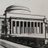

name : MIT in 1916
location : Cambridge, MA
created_at : Tue Feb 17 15:03:13 +0000 2015
lang : en
protected : False
description : Celebrating MIT's move to Cambridge with news from 1916. Tweets by @MIT_alumni. Photos from @mitlibraries. Join the fun: https://t.co/wQTWJWsB5t
time_zone : None


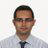

name : Utkan Menteş
location : İstanbul, Türkiye
created_at : Wed Mar 19 08:25:11 +0000 2014
lang : tr
protected : False
description : Cofounder of SnapBuy (Inoven)
time_zone : Istanbul


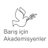

name : BarışAkademisyenleri
location : 
created_at : Wed Nov 25 06:57:30 +0000 2015
lang : tr
protected : False
description : Amacımız; hem çatışmasızlık hem de barışı inşa ve toplumsallaştırma süreçleri konularında örnekleri inceleyerek bilgi üretmek ve bilgiyi kamuoyuna sunmak
time_zone : Pacific Time (US & Canada)


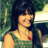

name : Özlem Beyarslan
location : 
created_at : Fri Jan 20 10:30:21 +0000 2012
lang : tr
protected : False
description : 
time_zone : Istanbul


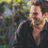

name : nedim ruacan
location : Istanbul, Turkey
created_at : Sun May 19 14:23:22 +0000 2013
lang : en
protected : False
description : drums & electronics
time_zone : None


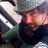

name : OGUZ KAPLANGI
location : Istanbul
created_at : Fri Jun 04 14:29:58 +0000 2010
lang : en
protected : False
description : 
time_zone : Istanbul


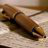

name : fuatavni
location : 
created_at : Sat Oct 25 21:38:09 +0000 2014
lang : tr
protected : False
description : Haber_Analiz
time_zone : Arizona


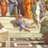

name : Alexandre Borovik
location : 
created_at : Thu Feb 05 16:53:54 +0000 2015
lang : en
protected : False
description : I tweet only about mathematics and mathematics education. Tweets express my own views. Retweets are not endorsements.
time_zone : None


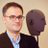

name : Huseyin H.
location : Ankara, Türkiye
created_at : Mon Dec 28 16:29:01 +0000 2015
lang : en
protected : False
description : Associate Professor at @METU_ODTU Graduate School of Informatics, ex-Londoner, bookaholic, jazz-lover, cyclist, dad. #audio #acoustics #sound #MMI
time_zone : Istanbul


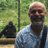

name : Şenova Ülker
location : 
created_at : Fri Jun 28 20:25:47 +0000 2013
lang : tr
protected : False
description : 
time_zone : None


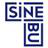

name : SineBU
location : 
created_at : Wed Apr 29 08:49:27 +0000 2015
lang : tr
protected : False
description : Boğaziçi Üniversitesi ve İstanbullular yeni bir Sinema Salonu’na kavuştu. SineBU, 2 Mayıs 2015 itibariyle Başka Sinema işbirliğiyle perdelerini açtı.
time_zone : Bucharest


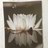

name : Selim Ergen
location : 
created_at : Sat Jun 01 12:27:47 +0000 2013
lang : en
protected : False
description : 
time_zone : None


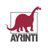

name : Ayrıntı Yayınları
location : İstanbul/TURKEY
created_at : Thu Sep 16 14:33:05 +0000 2010
lang : tr
protected : False
description : Ayrıntılar önemlidir!.. https://t.co/YTCqrLGtof https://t.co/Zu0LISTORA info@ayrintiyayinlari.com.tr
time_zone : Istanbul


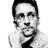

name : Edward Snowden
location : 
created_at : Thu Dec 11 21:24:28 +0000 2014
lang : en
protected : False
description : I used to work for the government. Now I work for the public. Director at @FreedomofPress.
time_zone : Eastern Time (US & Canada)


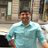

name : Ilker Yildirim
location : Boston, MA
created_at : Tue Jan 03 23:56:40 +0000 2012
lang : en
protected : False
description : Cognitive Science, Artificial Intelligence, Neuroscience. Research Scientist at MIT.
time_zone : Eastern Time (US & Canada)


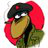

name : karga kafasi
location : 
created_at : Sun Mar 02 23:31:00 +0000 2014
lang : tr
protected : True
description : 
time_zone : Athens


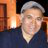

name : Selçuk R. Şirin
location : New York, NY
created_at : Sun Jan 02 21:46:33 +0000 2011
lang : en
protected : False
description : J. K. Javits Professor @NYUniversity Hürriyet yazıları https://t.co/Y5nqs8U1Oc Yol Ayrımındaki Türkiye https://t.co/i1N4Xw70YL TEDTalk https://t.co/pcVQzf2Eor
time_zone : Istanbul


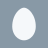

name : Taha Yusuf Ceritli
location : 
created_at : Sat Feb 12 17:03:43 +0000 2011
lang : en
protected : False
description : 
time_zone : None


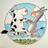

name : Bol Bilim
location : İstanbul, Türkiye
created_at : Wed Aug 05 17:20:51 +0000 2015
lang : en
protected : False
description : Akademiden Notlar
(bolbilim@gmail.com)
time_zone : Pacific Time (US & Canada)


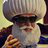

name : Hodja
location : 
created_at : Sun Nov 10 13:23:15 +0000 2013
lang : tr
protected : False
description : Astrophysicist, not affiliated with Nasreddin Hodja. Burada yazılanların gerçek kişi ve/veya kurumlarla ilgisi yoktur. İletişim; hodjaniz@gmail.com
time_zone : Istanbul


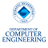

name : Bogazici Cmp Eng.
location : 
created_at : Wed Jul 15 11:17:06 +0000 2015
lang : en
protected : False
description : @UniBogazici Bilgisayar Mühendisliği, 

Bogazici University, Department of Computer Engineering Twitter Account
time_zone : None


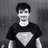

name : Deniz
location : Madrid
created_at : Sun Nov 02 19:02:50 +0000 2008
lang : en
protected : False
description : 
time_zone : Madrid


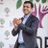

name : Selahattin Demirtaş
location : 
created_at : Thu Dec 09 12:21:24 +0000 2010
lang : tr
protected : False
description : Halkların Demokratik Partisi                                         Eş Genel Başkanı
time_zone : Istanbul


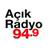

name : acikradyo
location : istanbul
created_at : Mon Jun 01 17:12:45 +0000 2009
lang : tr
protected : False
description : Kâinatın tüm seslerine, renklerine ve titreşimlerine Açık Radyo.
time_zone : Istanbul


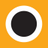

name : bianet
location : Turkey
created_at : Wed Aug 19 10:44:50 +0000 2009
lang : en
protected : False
description : Bağımsız İletişim Ağı resmi hesabıdır. English: https://t.co/jXDde4NFDG
Kurdî : https://t.co/TcDpEFpwkc
time_zone : Istanbul


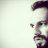

name : Erdem Yoruk
location : 
created_at : Tue Dec 14 23:30:24 +0000 2010
lang : en
protected : False
description : phd, aplied mathematician & electrical engineer, vispera information technologies, bogazici university
time_zone : Eastern Time (US & Canada)


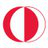

name : METU / ODTÜ
location : Ankara, Turkey
created_at : Fri Sep 25 11:11:18 +0000 2009
lang : en
protected : False
description : Orta Doğu Teknik Üniversitesi (ODTÜ) / Middle East Technical University (METU) - kio@metu.edu.tr
time_zone : Istanbul


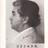

name : Aziz Nesin Arşivi
location : Nesin Yayınevi 
created_at : Sat Oct 20 13:55:09 +0000 2012
lang : tr
protected : False
description : Sahibinin sesi Aziz Nesin Arşivi, bir Nesin Yayınevi hizbidir. [Esin Pervane & Salih Bora]
time_zone : Athens


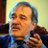

name : İlber Ortaylı
location : Parodi
created_at : Tue Nov 18 17:51:02 +0000 2014
lang : tr
protected : False
description : Parody account. Bu hesabın gerçek kişi ve kurumlarla alakası yoktur. Bu bir hayran sayfasıdır.
time_zone : Istanbul


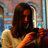

name : Hazal Koptagel
location : 
created_at : Thu Apr 21 18:03:45 +0000 2011
lang : en
protected : True
description : #Diren
time_zone : Istanbul


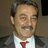

name : Kadir İnanır
location : 
created_at : Sat Oct 25 23:26:24 +0000 2014
lang : tr
protected : False
description : Sanatçı
time_zone : Istanbul


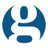

name : The Guardian
location : London
created_at : Thu Nov 05 23:49:19 +0000 2009
lang : en
protected : False
description : News and features from the world's leading liberal voice
time_zone : London


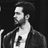

name : Atakan Arıkan
location : Tartu, Eesti
created_at : Tue Aug 02 00:13:14 +0000 2011
lang : en
protected : False
description : I think it's marvelous.
time_zone : Istanbul


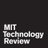

name : MIT Tech Review
location : Cambridge, MA
created_at : Mon Aug 11 14:31:16 +0000 2008
lang : en
protected : False
description : MIT Technology Review equips its audiences with the intelligence to understand a world shaped by technology.
time_zone : Eastern Time (US & Canada)


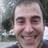

name : Çağatay Laikyan
location : 
created_at : Mon Apr 09 19:49:03 +0000 2012
lang : en
protected : False
description : Bogazici Computer Eng
time_zone : Baghdad


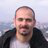

name : Serhan Daniş
location : 
created_at : Fri Dec 28 17:25:58 +0000 2012
lang : en
protected : False
description : researcher, knowledge chaser, machine teacher.
time_zone : Athens


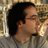

name : Ertuğ Karamatlı
location : 
created_at : Fri May 30 14:25:45 +0000 2008
lang : en
protected : False
description : Software Architect at https://t.co/hKCVQJeARb, Machine Learning PhD Student at Bogazici University
time_zone : Istanbul


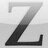

name : Zaytung Son Dakika
location : parady account
created_at : Mon Aug 27 18:15:45 +0000 2012
lang : tr
protected : False
description : http://t.co/KqdjXOrfhC son dakika, haber ve dergi içerikleri otomatik twitlenir.
time_zone : Istanbul


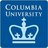

name : Columbia University
location : New York, New York
created_at : Mon Feb 07 18:58:59 +0000 2011
lang : en
protected : False
description : For more than 250 years, Columbia has been a leader in higher education in the nation and around the world.
time_zone : Eastern Time (US & Canada)


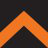

name : Princeton University
location : Princeton, NJ
created_at : Tue May 01 21:04:01 +0000 2007
lang : en
protected : False
description : The official Twitter account of Princeton University. Use #PrincetonU to join the conversation!
time_zone : Eastern Time (US & Canada)


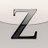

name : zaytung
location : parody account
created_at : Sat Sep 28 20:18:38 +0000 2013
lang : tr
protected : False
description : http://t.co/KqdjXO9Eq4 son dakika, haber ve dergi içerikleri twitlenir. Zaytung'un kendi twitter hesabı @zaytung dur. Reklam ve iletişim; zaytungtv@yandex.com
time_zone : Istanbul


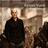

name : Kenan Vural
location : İstanbul
created_at : Tue May 07 20:16:03 +0000 2013
lang : tr
protected : False
description : 
time_zone : Istanbul


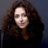

name : Ece Temelkuran
location : istanbul, mostly
created_at : Sun Sep 13 13:16:20 +0000 2009
lang : en
protected : False
description : Ece Temelkuran's official account- Author - political commentator - Turkey: The Insane and the Melancholy (August, 2016) Women Who Blow On Knots (May, 2017)
time_zone : Istanbul


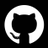

name : GitHub
location : San Francisco, CA
created_at : Mon Feb 11 04:41:50 +0000 2008
lang : en
protected : False
description : How people build software
time_zone : Pacific Time (US & Canada)


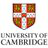

name : Cambridge University
location : Cambridge, England
created_at : Mon Apr 20 10:14:14 +0000 2009
lang : en
protected : False
description : News and Events from the University of Cambridge
time_zone : London


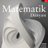

name : Matematik Dünyası
location : 
created_at : Tue May 06 23:58:59 +0000 2014
lang : tr
protected : False
description : Üç aylık popüler matematik dergisi. https://t.co/SPhN0VJVGW md@msgsu.edu.tr
time_zone : Istanbul


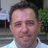

name : Tolga Durdu
location : Istanbul
created_at : Tue Apr 28 17:52:33 +0000 2009
lang : en
protected : False
description : Interested in Big Data, Data Science, Analytics, Behavioral Economics, and Neuroscience. Entrepreneur, Engineer & Management Scientist. Twts in English/Turkish.
time_zone : Kyiv


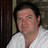

name : Yann LeCun
location : New York
created_at : Wed Jun 17 16:05:51 +0000 2009
lang : en
protected : False
description : 
time_zone : Central Time (US & Canada)


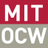

name : MIT OpenCourseWare
location : Cambridge, MA
created_at : Mon Jan 26 15:53:57 +0000 2009
lang : en
protected : False
description : Free lecture notes, exams, and videos from @MIT. No registration required. Part of MIT's Office of Digital Learning. For #MOOCs from MIT follow @MITxonedX.
time_zone : Eastern Time (US & Canada)


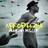

name : Marcus Miller
location : Los Angeles
created_at : Fri May 01 23:24:43 +0000 2009
lang : en
protected : False
description : Musician/Bass Player
time_zone : Pacific Time (US & Canada)


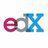

name : edX
location : Cambridge, MA
created_at : Mon Apr 30 14:48:12 +0000 2012
lang : en
protected : False
description : Free online courses from @Harvard @MIT & more of the world's top schools. For Student Support visit https://t.co/YhADzMwK4Y. Enroll now: https://t.co/QWYfmbDY05
time_zone : Atlantic Time (Canada)


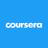

name : Coursera
location : 
created_at : Wed Aug 10 02:38:53 +0000 2011
lang : en
protected : False
description : We provide universal access to the world’s best education. For support, please visit http://t.co/RmtBX30PV0
time_zone : Pacific Time (US & Canada)


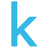

name : Kaggle
location : San Francisco
created_at : Tue Oct 06 22:42:08 +0000 2009
lang : en
protected : False
description : The world's largest community of data scientists. Join us to compete, collaborate, learn, and share your work.
time_zone : Pacific Time (US & Canada)


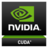

name : CUDA, GPU Computing
location : 
created_at : Tue Nov 10 21:38:41 +0000 2009
lang : en
protected : False
description : News from NVIDIA about CUDA, GPU Computing, and Parallel Programming.
time_zone : Pacific Time (US & Canada)


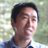

name : Andrew Ng
location : Mountain View, CA
created_at : Thu Nov 18 03:39:11 +0000 2010
lang : en
protected : False
description : Chief Scientist of Baidu; Chairman and Co-Founder of Coursera; Stanford CS faculty. #machinelearning, #deeplearning #MOOCs, #edtech
time_zone : None


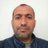

name : Abuzer Yakaryilmaz
location : 
created_at : Sun Aug 24 19:18:35 +0000 2014
lang : tr
protected : False
description : 
time_zone : None


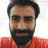

name : Levent Sagun
location : 
created_at : Thu Oct 13 05:12:40 +0000 2011
lang : en
protected : False
description : 
time_zone : Eastern Time (US & Canada)


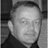

name : Jan Larsen
location : Hovedstaden, København
created_at : Wed Mar 18 16:31:31 +0000 2009
lang : en
protected : False
description : Jan Larsen PhD is Professor at DTU Compute, Director of Danish Sound, and have autored more than 150 publications in machine learning and signal processing.
time_zone : Copenhagen


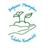

name : BuKoop
location : 
created_at : Fri Feb 01 15:19:53 +0000 2013
lang : en
protected : False
description : Boğaziçi Mensupları Tüketim Kooperatifi
time_zone : Athens


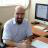

name : Ali Emre Pusane
location : Istanbul, Türkiye
created_at : Sun Mar 07 17:17:35 +0000 2010
lang : en
protected : False
description : Associate Professor of Electrical and Electronics Engineering at Bogazici University.
time_zone : Istanbul


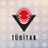

name : TÜBİTAK
location : Ankara
created_at : Fri Mar 09 12:26:20 +0000 2012
lang : tr
protected : False
description : Türkiye Bilimsel ve Teknolojik Araştırma Kurumu
time_zone : Istanbul


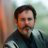

name : Murat Gülsoy
location : 
created_at : Tue Sep 01 14:40:18 +0000 2009
lang : en
protected : True
description : http://t.co/PB500cEYGY
time_zone : Istanbul


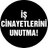

name : İş Cinayetleri
location : 
created_at : Sat May 26 08:27:45 +0000 2012
lang : tr
protected : False
description : İş Cinayetlerinde Hayatını Kaybedenlerin Adalet Arayan Yakınları; HER AYIN İLK PAZAR GÜNÜ saat 13.00'te, Galatasaray Meydanı'nda, 'Vicdan ve Adalet Nöbeti'nde!
time_zone : Baghdad


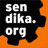

name : sendika.org
location : 
created_at : Mon Nov 22 10:32:36 +0000 2010
lang : tr
protected : False
description : Emeğin ve Direnişin Sesi
time_zone : Istanbul


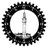

name : İSİG Meclisi
location : 
created_at : Mon Jul 25 17:12:49 +0000 2011
lang : en
protected : False
description : Sağlıklı ve güvenli çalışmak istiyoruz!
time_zone : Istanbul


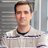

name : Furkan Kıraç
location : Istanbul
created_at : Wed Jun 09 19:31:03 +0000 2010
lang : en
protected : False
description : Assist. Prof. / Ozyegin University / Department of Computer Science / poke 53280, 0
time_zone : Istanbul


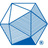

name : MAA
location : 
created_at : Mon Jun 22 15:46:47 +0000 2009
lang : en
protected : False
description : The Mathematical Association of America is the world's largest community of mathematicians, students, and enthusiasts.
time_zone : Eastern Time (US & Canada)


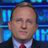

name : Conrad Hackett
location : Washington, DC
created_at : Fri Sep 04 21:25:12 +0000 2009
lang : en
protected : False
description : @PewResearch Senior Demographer, Associate Director
time_zone : Eastern Time (US & Canada)


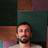

name : burcin unlu
location : Istanbul
created_at : Tue Jun 23 16:01:49 +0000 2009
lang : en
protected : False
description : Bogazici University, Department of Physics
time_zone : Istanbul


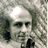

name : John Allen Paulos
location : Philadelphia, PA
created_at : Mon Jun 15 15:22:06 +0000 2009
lang : en
protected : False
description : Math prof, bestselling author (Innumeracy, Mathematician Reads Newspaper, etc. In Nov: A Numerate Life http://t.co/01sq4AHK4e), columnist, speaker, ruminator.
time_zone : Eastern Time (US & Canada)


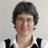

name : Lale Akarun
location : 
created_at : Tue Jun 18 09:45:12 +0000 2013
lang : en
protected : False
description : Akademisyen
time_zone : None


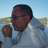

name : Haluk Bingol
location : istanbul
created_at : Mon Apr 20 15:28:40 +0000 2009
lang : en
protected : False
description : curious
time_zone : Santiago


In [14]:
for ix, f in enumerate(followings[:100]):
    try:
        show_user_profile(json.loads(data)[ix])
    except Exception as e:
        pass

# Tweets of a User

In [15]:
username="AliTaylanCemgil"

In [16]:
request = "https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name="+username
response,data = client.request(request)

In [17]:
def show_tweet(tweet_data):
    print " "
    print "_"*100
    info = ["text", "quoted_status", "created_at"]
    for i in info:
        if i == "quoted_status":
            if "retweeted_status" in tweet_data and "quoted_status" in tweet_data["retweeted_status"]:
                print tweet_data["retweeted_status"]["quoted_status"]["text"]
                if "media" in tweet_data["retweeted_status"]["quoted_status"]["entities"]:
                    URL = tweet_data["retweeted_status"]["quoted_status"]["entities"]["media"][0]["media_url"]
                    file = cStringIO.StringIO(urllib.urlopen(URL).read())
                    img = Image.open(file)
                    display.display(img)
            if "quoted_status" in tweet_data:
                print tweet_data["quoted_status"]["text"]  
        elif i == "media":
            if "media" in tweet_data["entities"]: 
                URL = tweet_data["entities"]["media"][0]["media_url"]
                file = cStringIO.StringIO(urllib.urlopen(URL).read())
                img = Image.open(file)
                display.display(img)
        else:
            print i , ":" ,  tweet_data[i]

 
____________________________________________________________________________________________________
text : RT @kyrah: I absolutely love this piece by the wonderful @Dymaxion. Thanks for making my day! &lt;3 Makes me wish I had the patience to learn…
created_at : Wed Jan 04 07:09:47 +0000 2017
 
____________________________________________________________________________________________________
text : RT @ceninsorgusu: Dünyanın en güzel kalecisi :) https://t.co/r4p1Slf3y9
created_at : Wed Jan 04 07:06:54 +0000 2017
 
____________________________________________________________________________________________________
text : RT @AVBorovik: Wow! https://t.co/0pWXil12dE
Cardioid in the wild. #mathphoto https://t.co/WgVhIeXfuR


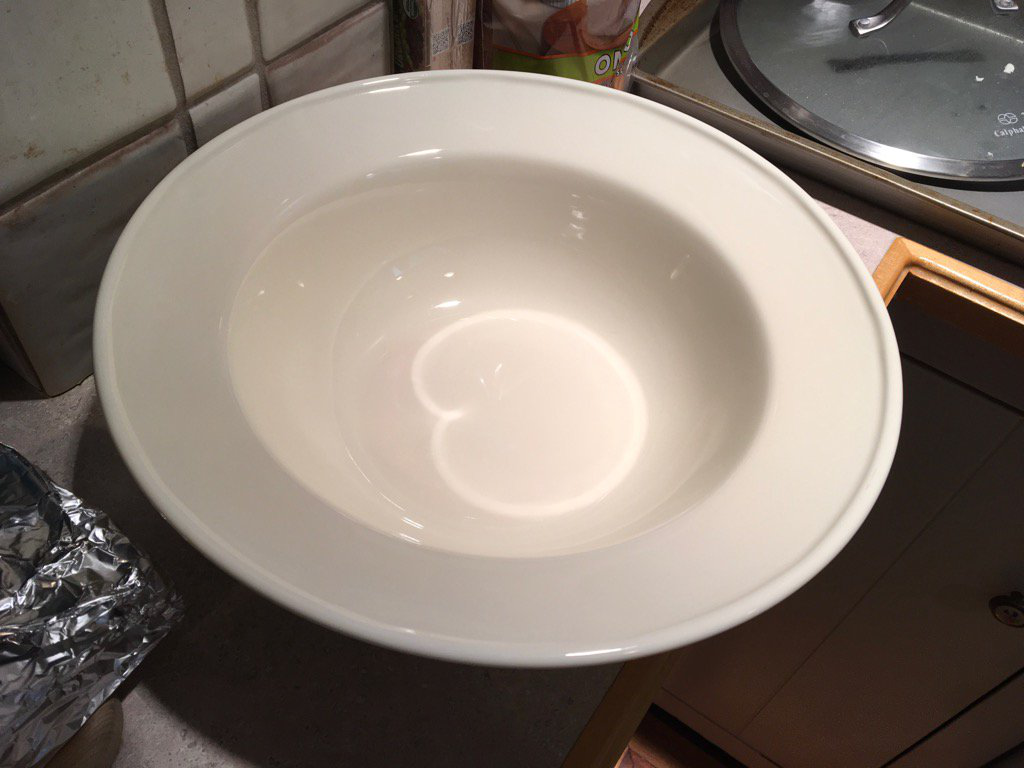

created_at : Sat Dec 31 20:40:47 +0000 2016
 
____________________________________________________________________________________________________
text : RT @say_cem: Sevgili matematikseverler! 15 Temmuz'da yayınlanma talihsizliğine uğrayıp güme giden şu yazımı okudunuz mu?
https://t.co/HvZgX…
created_at : Wed Dec 28 16:35:16 +0000 2016
 
____________________________________________________________________________________________________
text : RT @say_cem: John von Neumann'ın doğumgünü
"İnsanların matematiğin basit olduğuna inanmamalarının nedeni, hayatın ne kadar karışık olduğunu…
created_at : Wed Dec 28 09:50:58 +0000 2016
 
____________________________________________________________________________________________________
text : RT @MeltemGurle: “Güzel şeyler olacakken kötü şeyler neden olur? Bunu neden yaparlar?”  https://t.co/rzZO1S5oe9
created_at : Tue Dec 27 10:45:59 +0000 2016
 
__________________________________________________________________________________________________

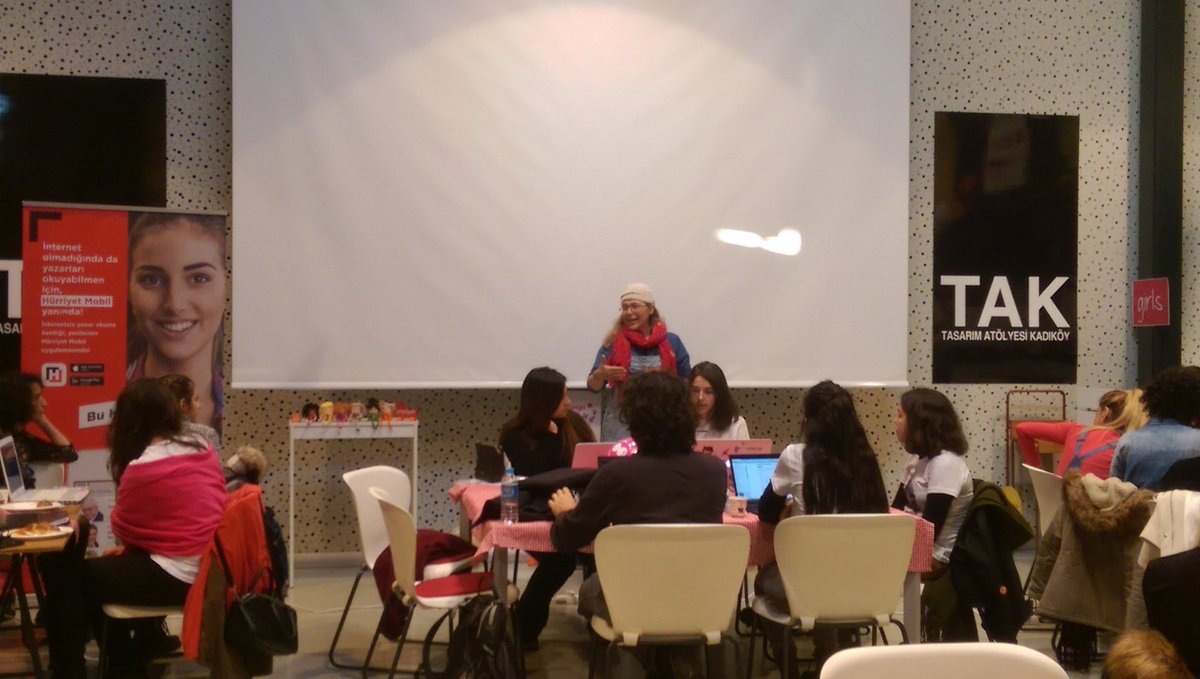

created_at : Sat Dec 17 11:30:55 +0000 2016
 
____________________________________________________________________________________________________
text : RT @mcaglayanyildiz: İlk fotoğraf sergim 27 Aralık'a kadar @cafemitanni 'de sürüyor. Bekleriz. https://t.co/mKWyvDIQoB
created_at : Fri Dec 16 12:38:35 +0000 2016
 
____________________________________________________________________________________________________
text : RT @AndrewYNg: As speech-recognition accuracy goes from 95% to 99%, we'll go from barely using it to using all the time! https://t.co/TfjqJ…
created_at : Fri Dec 16 07:31:24 +0000 2016
 
____________________________________________________________________________________________________
text : RT @Kaan_H_Okten: Çok hoş bu...
Türkçelerini de ekledim: https://t.co/aNgBHAcQxP
created_at : Fri Dec 16 07:29:35 +0000 2016
 
____________________________________________________________________________________________________
text : RT @cengizbaysal: Selam müzisyen arkadaslar

In [18]:
tweets = json.loads(data)
for tweet in tweets:
    show_tweet(tweet)

# Tweets containing some keyword

In [29]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textwrap import TextWrapper

In [30]:
#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):
    
    status_wrapper = TextWrapper(width=60, initial_indent='    ', subsequent_indent='    ')

    def on_status(self, status):
        try:
            print self.status_wrapper.fill(status.text)
            print '\n %s  %s  via %s\n' % (status.author.screen_name, status.created_at, status.source)
        except:
            # Catch any unicode errors while printing to console
            # and just ignore them to avoid breaking application.
            pass

    def on_error(self, status_code):
        print 'An error has occured! Status code = %s' % status_code
        return True  # keep stream alive

    def on_timeout(self):
        print 'Snoozing Zzzzzz'

In [31]:
#This handles Twitter authetification and the connection to Twitter Streaming API
l = StdOutListener()
auth = OAuthHandler(Consumer_Key, Consumer_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
stream = Stream(auth, l)

In [ ]:
#This line filter Twitter Streams to capture data by the keywords
stream.filter(languages=['tr'],  track=['BES'])

    wala na bes patay na jdjdidkdkskdjdjeke
    https://t.co/KIAnYypSvi

 omiviceral  2017-01-04 10:45:54  via Mobile Web (M5)

    İşçilere zorunlu BES'ten çıkma çağrısı
    #PatronlarıBESleme https://t.co/95eT37gI9P

 azeryadigar  2017-01-04 10:46:39  via TweetDeck

    BES Ayrılma İşlemleri | https://t.co/By5BLttNFR
    https://t.co/vRKBURP7qY

 olgunkilic  2017-01-04 10:47:35  via Facebook

    RT @omiviceral: wala na bes patay na jdjdidkdkskdjdjeke
    https://t.co/KIAnYypSvi

 DeannaSedillo  2017-01-04 10:48:29  via Twitter Web Client

    Sendikalar zorunlu BES’ten çıkışı örgütlesin! Krizin
    bedelini emekçiler ödemesin!  https://t.co/YBBh0ilus0
    https://t.co/69erWccvNN

 gercekgazetesi  2017-01-04 10:49:16  via Twitter for iPhone

    @BesKarylle oo bes gdkjhefke

 omiviceral  2017-01-04 10:50:11  via Mobile Web (M5)

    Bes kinilig ako dun sa Ravi feat Ken sdkjadkljfhakjsdfas

 taekmetothewoon  2017-01-04 10:52:20  via Twitter Web Client

    RT @naberneyaptin: Selamun a